# BiasVarianceDecomposition

## 1. Oferfit

**Датасет:movie_data.csv**

*   Загрузить данные.
*   Сохранить в переменную df
*   Выполнить EDA(предварительный анализ данных).
*   Сохранить в переменную df_clean
*   Выполните кодирование и масштабирование данных
*   Разделите на тестовую и обучающую выборки - 70% и 30% соответственно.
*   Сохранить в переменную x_train, y_train, x_test, y_test
*   Используйте PolynomialFeatures со степенью 3 и преобразуйте X_train_scaled и X_test_scaled.
*   Обучите модель LinearRegression.
*   Создайте график прогнозов для обучающего набора в сравнении с фактическими данными
*   Добавьте на то же полотно график прогнозов для тестового набора в сравнении с фактическими данными
*   Создайте функцию bias() для расчета смещения прогнозов модели с учетом фактических данных.
*   Создайте функцию variance() для расчета дисперсии предсказаний модели
Подсчитайте bias и variance на обучающей выборке.
*   Сохранить в переменные train_bias, train_variance
*   Подсчитайте bias и variance на тестовой выборке.
*   Сохранить в переменные test_bias, test_variance


**Критерии прохождения:**

train_bias <= -2.06-09

train_variance <= 7394168636697528

test_bias <= -68166032.47

test_variance <= 4.7


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
df = pd.read_csv('movie_data.csv')
# Просмотр первых строк данных
print(df.head())

   Unnamed: 0.1  Unnamed: 0    budget  domgross             title  \
0             0           0  13000000  25682380     21 &amp; Over   
1             1           1  45658735  13414714          Dredd 3D   
2             2           2  20000000  53107035  12 Years a Slave   
3             3           3  61000000  75612460            2 Guns   
4             4           4  40000000  95020213                42   

   Response_Json  Year  imdbRating  Metascore  imdbVotes         Model  
0              0  2008         6.8         48     206513  4.912759e+07  
1              0  2012         0.0          0          0  2.267265e+05  
2              0  2013         8.1         96     537525  1.626624e+08  
3              0  2013         6.7         55     173726  7.723381e+07  
4              0  2013         7.5         62      74170  4.151958e+07  


In [3]:
# Основная информация о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   30 non-null     int64  
 1   Unnamed: 0     30 non-null     int64  
 2   budget         30 non-null     int64  
 3   domgross       30 non-null     int64  
 4   title          30 non-null     object 
 5   Response_Json  30 non-null     int64  
 6   Year           30 non-null     int64  
 7   imdbRating     30 non-null     float64
 8   Metascore      30 non-null     int64  
 9   imdbVotes      30 non-null     int64  
 10  Model          30 non-null     float64
dtypes: float64(2), int64(8), object(1)
memory usage: 2.7+ KB
None


In [4]:
# Описательная статистика
print(df.describe())

       Unnamed: 0.1  Unnamed: 0        budget      domgross  Response_Json  \
count     30.000000   30.000000  3.000000e+01  3.000000e+01           30.0   
mean      14.500000   14.500000  6.753862e+07  8.529051e+07            0.0   
std        8.803408    8.803408  5.375102e+07  9.430000e+07            0.0   
min        0.000000    0.000000  5.500000e+06  4.167493e+06            0.0   
25%        7.250000    7.250000  2.625000e+07  2.759824e+07            0.0   
50%       14.500000   14.500000  5.250000e+07  5.562642e+07            0.0   
75%       21.750000   21.750000  9.800000e+07  1.041074e+08            0.0   
max       29.000000   29.000000  2.250000e+08  3.930501e+08            0.0   

              Year  imdbRating  Metascore      imdbVotes         Model  
count    30.000000   30.000000  30.000000      30.000000  3.000000e+01  
mean   1943.366667    6.073333  49.833333  174972.133333  8.529051e+07  
std     367.150677    2.188360  26.246948  144158.279111  6.294534e+07  
min  

In [5]:
# Проверка на пропущенные значения
print(df.isnull().sum())

Unnamed: 0.1     0
Unnamed: 0       0
budget           0
domgross         0
title            0
Response_Json    0
Year             0
imdbRating       0
Metascore        0
imdbVotes        0
Model            0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [9]:
# Удаление пропущенных значений (если они есть)
df_clean = df.dropna()

In [10]:
# Пример кодирования категориальных переменных (если они есть)
label_encoders = {}
for column in df_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le

In [11]:
# Масштабирование данных
scaler = StandardScaler()
X = df_clean.drop('imdbRating', axis=1)
y = df_clean['imdbRating']
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [17]:
import matplotlib.pyplot as plt

In [18]:
# Прогнозы для обучающего набора
y_train_pred = model.predict(X_train_poly)

In [19]:
print(y_train_pred)

[ 6.80000000e+00  7.50000000e+00  6.40000000e+00  6.30000000e+00
  7.30000000e+00  7.20000000e+00  5.90000000e+00 -2.66453526e-15
  8.10000000e+00 -2.84217094e-14  6.70000000e+00  6.70000000e+00
  7.50000000e+00  6.60000000e+00  7.10000000e+00 -8.88178420e-16
  7.80000000e+00  7.30000000e+00  7.80000000e+00  6.60000000e+00
  5.30000000e+00]


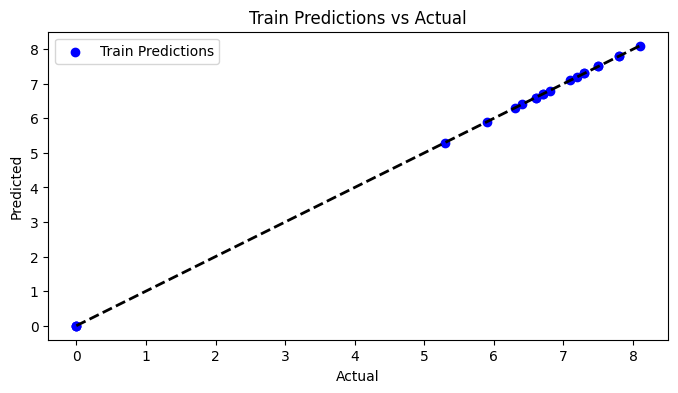

In [21]:
# График
plt.figure(figsize=(8, 4))
plt.scatter(y_train, y_train_pred, color='blue', label='Train Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Predictions vs Actual')
plt.legend()
plt.show()

In [22]:
# Прогнозы для тестового набора
y_test_pred = model.predict(X_test_poly)
print(y_test_pred)

[7.43483301 7.27593059 6.96974952 6.39549054 7.97075288 5.88641359
 8.03451912 6.59891481 6.78482738]


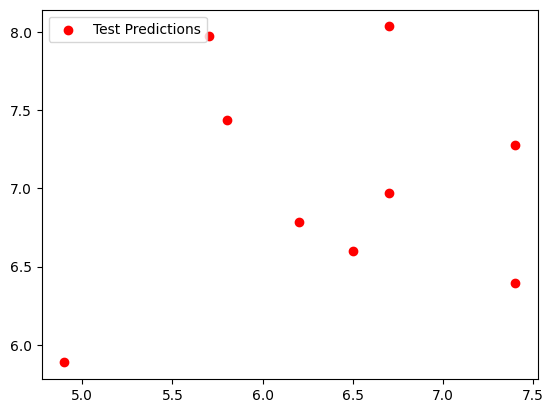

In [23]:
# Добавление на тот же график
plt.scatter(y_test, y_test_pred, color='red', label='Test Predictions')
plt.legend()
plt.show()

In [24]:
import numpy as np

def bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

def variance(y_pred):
    return np.var(y_pred)

In [25]:
train_bias = bias(y_train, y_train_pred)
train_variance = variance(y_train_pred)

test_bias = bias(y_test, y_test_pred)
test_variance = variance(y_test_pred)

In [26]:
print(f"Train Bias: {train_bias}")
print(f"Train Variance: {train_variance}")
print(f"Test Bias: {test_bias}")
print(f"Test Variance: {test_variance}")

Train Bias: -6.767073673905716e-16
Train Variance: 6.307256235827684
Test Bias: 0.6723812707820715
Test Variance: 0.45307508674798197


## 2. BiasVariance

**Датасет: movie_data.csv**

Целевая переменная: **budget**

Задание:

*   Загрузить данные.
*   Сохранить в переменную df
*   Выполнить EDA(предварительный анализ данных).
*   Сохранить в переменную df_clean
*   Выполните кодирование и масштабирование данных
*   Разделите на тестовую и обучающую выборки - 70% и 30% соответственно.
*   Сохранить в переменную x_train, y_train, x_test, y_test
*   Обучите модель LinearRegression.
*   Создайте график прогнозов для обучающего набора в сравнении с фактическими данными
*   Добавьте на то же полотно график прогнозов для тестового набора в сравнении с фактическими данными
*   Создайте функцию bias() для расчета смещения прогнозов модели с учетом фактических данных.
*   Создайте функцию variance() для расчета дисперсии предсказаний модели
*   Подсчитайте bias и variance на обучающей выборке.
*   Сохранить в переменные train_bias, train_variance
*   Подсчитайте bias и variance на тестовой выборке.
*   Сохранить в переменные test_bias, test_variance

**Критерии прохождения:**

train_bias <= -4.06-09

train_variance <= 3406811040986517.0

test_bias <= -10982393.9

test_variance <= 1518678846127932.0

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Шаг 1: Загрузка данных
df = pd.read_csv('movie_data.csv')

In [30]:
# Шаг 2: Предварительный анализ данных (EDA)
print(df.head())
print()
print(df.info())
print()
print(df.describe())
print()
print(df.isnull().sum())
print()
df_clean = df.dropna()

# Шаг 3: Кодирование и масштабирование данных
label_encoders = {}
for column in df_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le

   Unnamed: 0.1  Unnamed: 0    budget  domgross             title  \
0             0           0  13000000  25682380     21 &amp; Over   
1             1           1  45658735  13414714          Dredd 3D   
2             2           2  20000000  53107035  12 Years a Slave   
3             3           3  61000000  75612460            2 Guns   
4             4           4  40000000  95020213                42   

   Response_Json  Year  imdbRating  Metascore  imdbVotes         Model  
0              0  2008         6.8         48     206513  4.912759e+07  
1              0  2012         0.0          0          0  2.267265e+05  
2              0  2013         8.1         96     537525  1.626624e+08  
3              0  2013         6.7         55     173726  7.723381e+07  
4              0  2013         7.5         62      74170  4.151958e+07  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  

In [31]:
scaler = StandardScaler()
X = df_clean.drop('budget', axis=1)
y = df_clean['budget']
X_scaled = scaler.fit_transform(X)

In [32]:
# Шаг 4: Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [33]:
# Шаг 5: Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

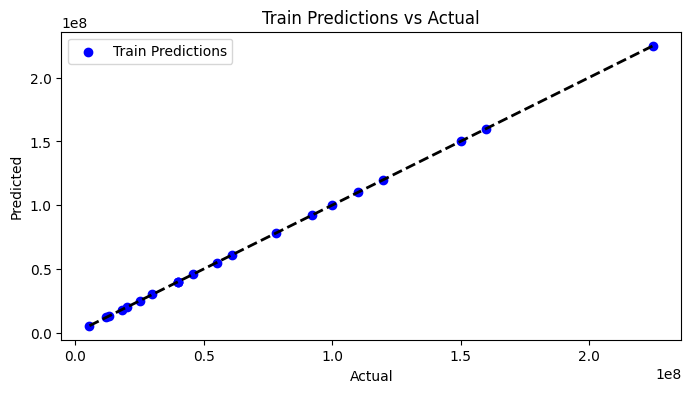

In [35]:
# Шаг 6: График для обучающего набора
y_train_pred = model.predict(X_train)
plt.figure(figsize=(8, 4))
plt.scatter(y_train, y_train_pred, color='blue', label='Train Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Predictions vs Actual')
plt.legend()
plt.show()

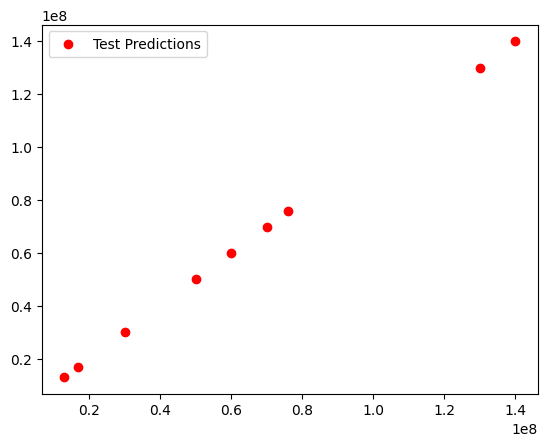

In [36]:
# Шаг 7: График для тестового набора
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred, color='red', label='Test Predictions')
plt.legend()
plt.show()

In [37]:
# Шаг 8: Функция для расчета смещения
def bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

# Шаг 9: Функция для расчета дисперсии
def variance(y_pred):
    return np.var(y_pred)

In [38]:
# Шаг 10: Расчет bias и variance для обучающей выборки
train_bias = bias(y_train, y_train_pred)
train_variance = variance(y_train_pred)

In [39]:
# Шаг 11: Расчет bias и variance для тестовой выборки
test_bias = bias(y_test, y_test_pred)
test_variance = variance(y_test_pred)

In [40]:
# Шаг 12: Проверка критериев
print(f"Train Bias: {train_bias}")
print(f"Train Variance: {train_variance}")
print(f"Test Bias: {test_bias}")
print(f"Test Variance: {test_variance}")

Train Bias: 3.54789552234468e-09
Train Variance: 3201492493698420.0
Test Bias: 1.241763432820638e-08
Test Variance: 1830987654320988.5


Второе решение

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [42]:
# Шаг 1: Загрузка данных
df = pd.read_csv('movie_data.csv')

# Шаг 2: Предварительный анализ данных (EDA)
print("Первые строки данных:")
print(df.head())

print("\nИнформация о данных:")
print(df.info())

print("\nОписательная статистика:")
print(df.describe())

print("\nПропущенные значения:")
print(df.isnull().sum())

Первые строки данных:
   Unnamed: 0.1  Unnamed: 0    budget  domgross             title  \
0             0           0  13000000  25682380     21 &amp; Over   
1             1           1  45658735  13414714          Dredd 3D   
2             2           2  20000000  53107035  12 Years a Slave   
3             3           3  61000000  75612460            2 Guns   
4             4           4  40000000  95020213                42   

   Response_Json  Year  imdbRating  Metascore  imdbVotes         Model  
0              0  2008         6.8         48     206513  4.912759e+07  
1              0  2012         0.0          0          0  2.267265e+05  
2              0  2013         8.1         96     537525  1.626624e+08  
3              0  2013         6.7         55     173726  7.723381e+07  
4              0  2013         7.5         62      74170  4.151958e+07  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):


In [43]:
# Удаление ненужных колонок (если они не используются)
df_clean = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Response_Json'])

# Шаг 3: Кодирование и масштабирование данных
# Пример: если есть категориальные переменные
categorical_features = ['title']  # 'title' - категориальный признак
numerical_features = ['Year', 'imdbRating', 'Metascore', 'imdbVotes', 'Model']  # числовые признаки

In [44]:
# Создание пайплайна для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [45]:
# Применение преобразований
X = df_clean.drop('budget', axis=1)
y = df_clean['budget']

In [46]:
# Преобразование данных
X_processed = preprocessor.fit_transform(X)

In [47]:
# Шаг 4: Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

In [48]:
# Шаг 5: Обучение модели LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [49]:
# Шаг 6: Создание графиков прогнозов
# Прогнозы для обучающего набора
train_predictions = model.predict(x_train)

# Прогнозы для тестового набора
test_predictions = model.predict(x_test)

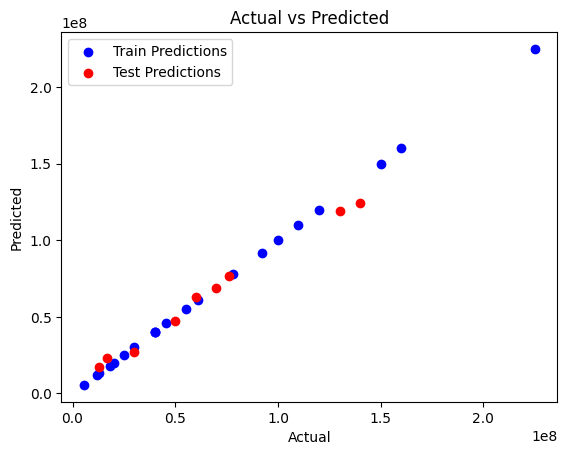

In [50]:
# График для обучающего набора
plt.scatter(y_train, train_predictions, color='blue', label='Train Predictions')
# График для тестового набора
plt.scatter(y_test, test_predictions, color='red', label='Test Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [51]:
# Шаг 7: Функции для расчета смещения и дисперсии
def bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

def variance(y_pred):
    return np.var(y_pred)

# Шаг 8: Подсчет bias и variance
# На обучающей выборке
train_bias = bias(y_train, train_predictions)
train_variance = variance(train_predictions)

# На тестовой выборке
test_bias = bias(y_test, test_predictions)
test_variance = variance(test_predictions)

In [52]:

print(f"Train Bias: {train_bias}, Train Variance: {train_variance}")
print(f"Test Bias: {test_bias}, Test Variance: {test_variance}")

Train Bias: 2.128737313406808e-09, Train Variance: 3201492493698445.5
Test Bias: -2138193.5589316944, Test Variance: 1367103646196588.5


## 3. BiasVariance**

**Формат ввода**

*   Создайте функцию целевой переменной как 5sin(10x) + случайный шум сгенерированного из равномерного распределения на отрезке [-1, 1].
*   Значения признаков и шум генерируются из одного и того же распределения.
*   Создайте наборы данных для 4 разных распределения для признаков и шума [normal(0, 0.3), exponential(0.3), uniform(-1, 1), uniform(0, 1)].
*   Обучите 4 разные модели [LinearRegression, DecisionTree, RandomForest, GradientBoosting] для 4 разных распределений.
*   Вычислите bias и variance для каждого случая.
*   Отранжируйте алгоритмы в порядке увеличения разброса.
*   Определите распределения с максимальным смещение.
*   Постройте графики зависимости смещения и разброса от кол-ва данных для четырех рассмотренных регрессионных алгоритмов.



In [53]:
import numpy as np
from scipy.stats import norm, expon, uniform
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from joblib import Parallel, delayed  # Для параллельных вычислений

In [54]:
# Шаг 1: Генерация данных
def generate_data(distribution, n_samples=1000):
    x = distribution.rvs(size=n_samples)
    noise = uniform.rvs(loc=-1, scale=2, size=n_samples)  # Uniform noise in [-1, 1]
    y = 5 * np.sin(10 * x) + noise
    return x.reshape(-1, 1), y

In [55]:
# Определим распределения
distributions = {
    'normal': norm(loc=0, scale=0.3),
    'exponential': expon(scale=0.3),
    'uniform_1': uniform(loc=-1, scale=2),
    'uniform_2': uniform(loc=0, scale=1)
}


In [56]:
# Шаг 2: Создание моделей
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(max_depth=5),  # Ограничиваем глубину дерева
    'RandomForest': RandomForestRegressor(n_estimators=50, max_depth=5, n_jobs=-1),  # Уменьшаем количество деревьев
    'GradientBoosting': GradientBoostingRegressor(n_estimators=50, max_depth=3)  # Уменьшаем количество деревьев
}

In [57]:
print(distributions)
print()
print(models)

{'normal': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cac1c984690>, 'exponential': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cac214c8a90>, 'uniform_1': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cac1c288cd0>, 'uniform_2': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cac1c289510>}

{'LinearRegression': LinearRegression(), 'DecisionTree': DecisionTreeRegressor(max_depth=5), 'RandomForest': RandomForestRegressor(max_depth=5, n_estimators=50, n_jobs=-1), 'GradientBoosting': GradientBoostingRegressor(n_estimators=50)}


In [58]:
# Шаг 3: Обучение моделей и вычисление bias и variance
def compute_bias_variance(model, X, y, n_bootstraps=50):  # Уменьшаем количество бутстрап-итераций
    predictions = np.zeros((n_bootstraps, len(y)))
    for i in range(n_bootstraps):
        sample_indices = np.random.choice(range(len(y)), len(y), replace=True)
        X_sample, y_sample = X[sample_indices], y[sample_indices]
        model.fit(X_sample, y_sample)
        predictions[i] = model.predict(X)
    mean_predictions = np.mean(predictions, axis=0)
    bias = np.mean((mean_predictions - y) ** 2)
    variance = np.mean(np.var(predictions, axis=0))
    return bias, variance

In [59]:
# Параллельное вычисление для всех моделей и распределений
def process_distribution(dist_name, dist):
    X, y = generate_data(dist, n_samples=500)  # Уменьшаем количество данных
    res = {}
    for model_name, model in models.items():
        bias, variance = compute_bias_variance(model, X, y)
        res[model_name] = {'bias': bias, 'variance': variance}
    return dist_name, res

In [60]:
# Используем Parallel для параллельных вычислений
results = dict(Parallel(n_jobs=-1)(delayed(process_distribution)(dist_name, dist) for dist_name, dist in distributions.items()))

In [61]:
# Шаг 4: Анализ результатов
for dist_name, res in results.items():
    print(f"Distribution: {dist_name}")
    sorted_models = sorted(res.items(), key=lambda x: x[1]['variance'])
    print("Models ranked by variance:", [m[0] for m in sorted_models])
    max_bias_model = max(res.items(), key=lambda x: x[1]['bias'])
    print(f"Model with max bias: {max_bias_model[0]} with bias {max_bias_model[1]['bias']}")

Distribution: normal
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 12.576450474635761
Distribution: exponential
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 8.212997151695292
Distribution: uniform_1
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 12.272494487939191
Distribution: uniform_2
Models ranked by variance: ['GradientBoosting', 'LinearRegression', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 11.446875794330449


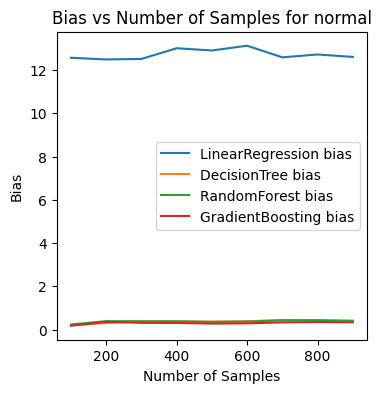

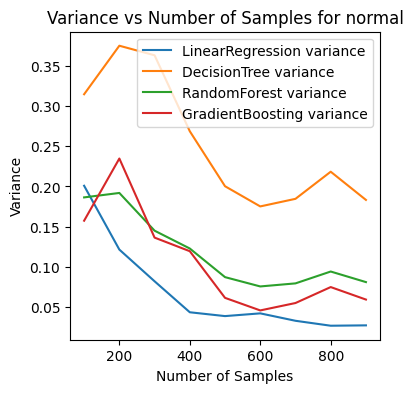

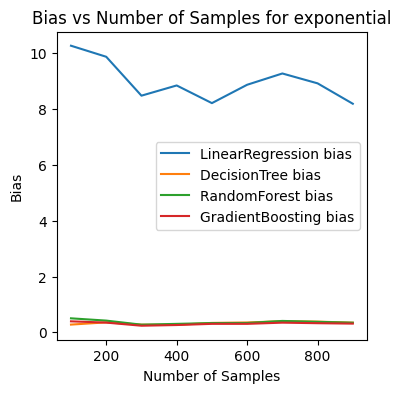

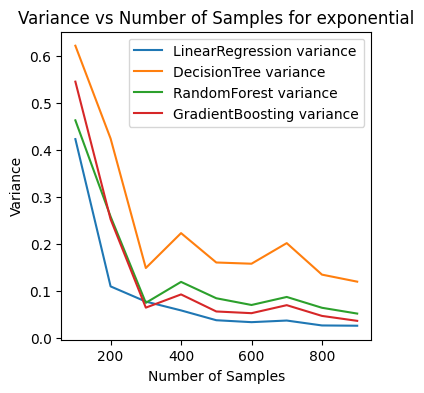

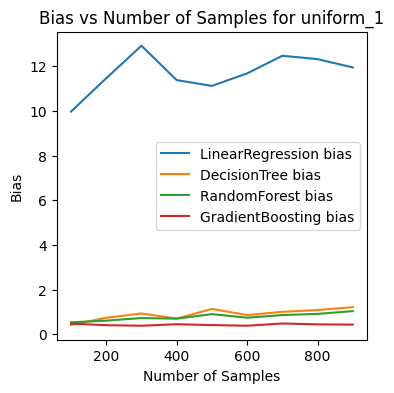

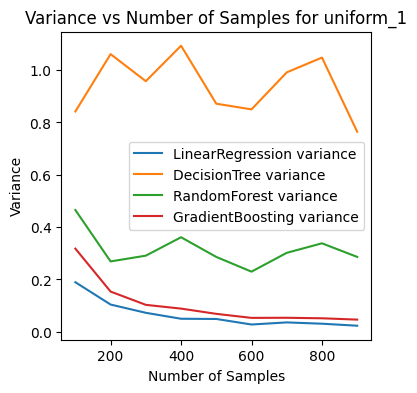

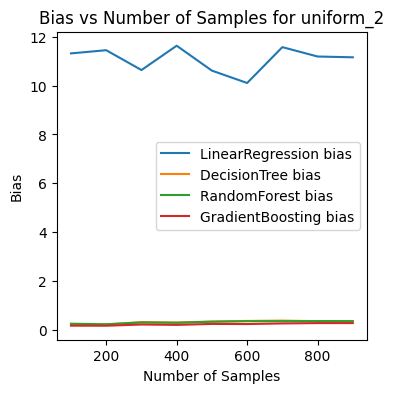

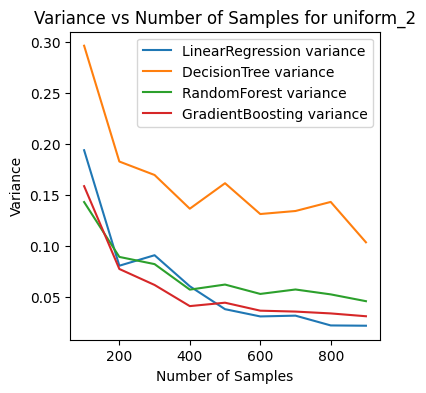

In [62]:
# Шаг 5: Построение графиков
n_samples_range = np.arange(100, 1000, 100)
for dist_name, dist in distributions.items():
    biases = {model_name: [] for model_name in models}
    variances = {model_name: [] for model_name in models}
    for n_samples in n_samples_range:
        X, y = generate_data(dist, n_samples)
        for model_name, model in models.items():
            bias, variance = compute_bias_variance(model, X, y)
            biases[model_name].append(bias)
            variances[model_name].append(variance)

    # График зависимости смещения от количества данных
    plt.figure(figsize=(4, 4))
    for model_name in models:
        plt.plot(n_samples_range, biases[model_name], label=f'{model_name} bias')
    plt.title(f'Bias vs Number of Samples for {dist_name}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Bias')
    plt.legend()
    plt.show()

    # График зависимости разброса от количества данных
    plt.figure(figsize=(4, 4))
    for model_name in models:
        plt.plot(n_samples_range, variances[model_name], label=f'{model_name} variance')
    plt.title(f'Variance vs Number of Samples for {dist_name}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Variance')
    plt.legend()
    plt.show()
